In [1]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient


In [10]:
#Local variables: figure out how to automate.
JobIDint = 7328685
JOBID = str(JobIDint)
tree_sizes_1 = list(range(5,435,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430]


In [7]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

transfer is done


In [ ]:
#for some reason, only went until 430 

In [7]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/6490104_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/6490104_output_files/100_3992out.csv
            trial      trial.1      trial.2      trial.3      trial.4
pd    7844.257842  7640.635044  7762.825492  8224.292926  8080.083796
mpd    301.698927   294.491422   306.098160   290.763585   301.174593
mntd   125.988690   110.652474   123.118859   121.874387   130.365231
trial      301.698927
trial.1    294.491422
trial.2    306.098160
trial.3    290.763585
trial.4    301.174593
Name: mpd, dtype: float64


In [8]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [9]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [11]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [12]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals


In [13]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

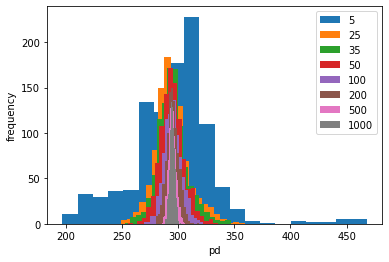

In [19]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_mpd['mpd5'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_mpd['mpd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_mpd['mpd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_mpd['mpd50'],bins = 20)
plt.hist(new_mpd['mpd100'],bins = 20)
plt.hist(new_mpd['mpd200'],bins = 20)
plt.hist(new_mpd['mpd500'],bins = 20)
plt.hist(new_mpd['mpd1000'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [13]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([85.42311879291688, 86.15508103474956, 83.21303561667621, 84.4366034270811, 83.62818470437432, 83.2153680496423, 82.93729641335963, 85.93413934592745, 85.89564171786954, 85.65262656751132, 85.54015783014069, 85.5685864963004, 84.86600730859328, 83.66731858208422, 84.88534550744438, 86.07804505936979, 85.72883437818915, 85.00777024178771, 85.44808171185359, 84.71589262084325, 84.96011219097713, 84.85404817652454, 84.85108677674916, 84.60254190306343, 86.05317894373377, 84.84768239404556, 85.40224975752217, 84.51233626247686, 85.28109208363834, 85.3872447653869, 85.52550877373884, 84.7511866853394, 84.90868307244408, 85.65861918589512, 84.34349467752288, 84.88996719152432, 86.23071059486057, 85.57302361990422, 85.33895256983928, 84.95404622707285, 85.337487051188, 85.32792396570666, 85.4977906710492, 85.55422118036788, 84.89469119281979, 85.2450406877956, 85.05208287300967, 84.6166609620055, 85.11605776276738, 84.54275007630076, 85.22364212284015, 84.78746683013209, 84.9270993923403, 85

In [14]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [15]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd5
120.57945437
mpd10
111.26253778444455
mpd15
104.52079506190479
mpd20
102.41265498828913
mpd25
100.42087394316667
mpd30
99.02285633695398
mpd35
97.34770087655463
mpd40
99.5652917729167
mpd45
99.26855833878791
mpd50
97.79371337557141
mpd55
97.16844470424246
mpd60
96.06844415413835
mpd65
95.98345382995186
mpd70
93.89673242048654
mpd75
94.90924413868463
mpd80
95.83111002670088
mpd85
95.2544732811484
mpd90
94.32419337119848
mpd95
94.41090360385219
mpd100
93.95311142499493
mpd105
93.93538539102563
mpd110
93.03467668694327
mpd115
93.16101675326463
mpd120
93.17571964124652
mpd125
94.08100329125162
mpd130
92.78605599761177
mpd135
92.83745371516103
mpd140
91.9434102579239
mpd145
93.0086631330843
mpd150
92.61473234704472
mpd155
92.14224925050695
mpd160
92.3337471681872
mpd165
91.72142459992237
mpd170
92.42542394459005
mpd175
91.38637171398686
mpd180
91.83258774733545
mpd185
92.3432397122943
mpd190
91.43095332896257
mpd195
91.58275467669837
mpd200
90.87641473282578
mpd205
91.493194071033
mpd2

In [129]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

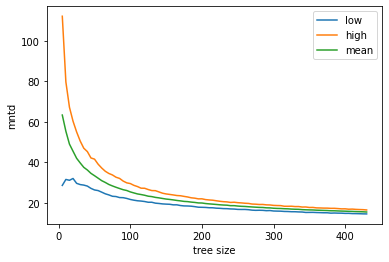

In [26]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig('mntd_95CI_bird.jpg', dpi=300)



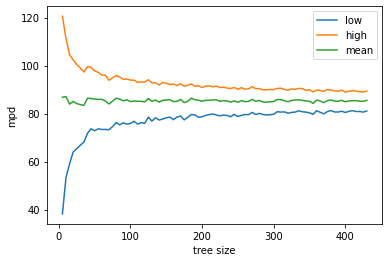

In [27]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('mpd_95CI_bird.jpg', dpi=300)



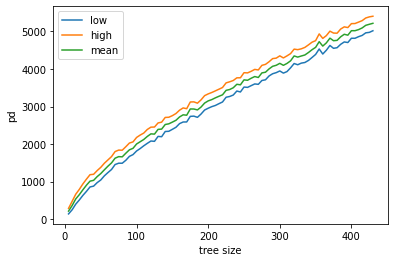

In [28]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI_bird.jpg', dpi=1200)

In [29]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap_bird.csv")


In [30]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap_bird.csv")

In [31]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap_bird.csv")